# Exploratory Data Analysis and Segmentation of the Original Dataset

Goals:
1. Evaluate details of the oroginal dataset
2. Find missing data
3. Create multiple datasets with missing data solutions
4. Perform EDA on most intuitively efficient solution

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer

%matplotlib inline

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/kxerxess/Diabetes-Prediction/master/data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.shape

(768, 9)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
columns = list(df.columns)
print(columns)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


Pregnancies, Glucose, BMI, Age are important features.

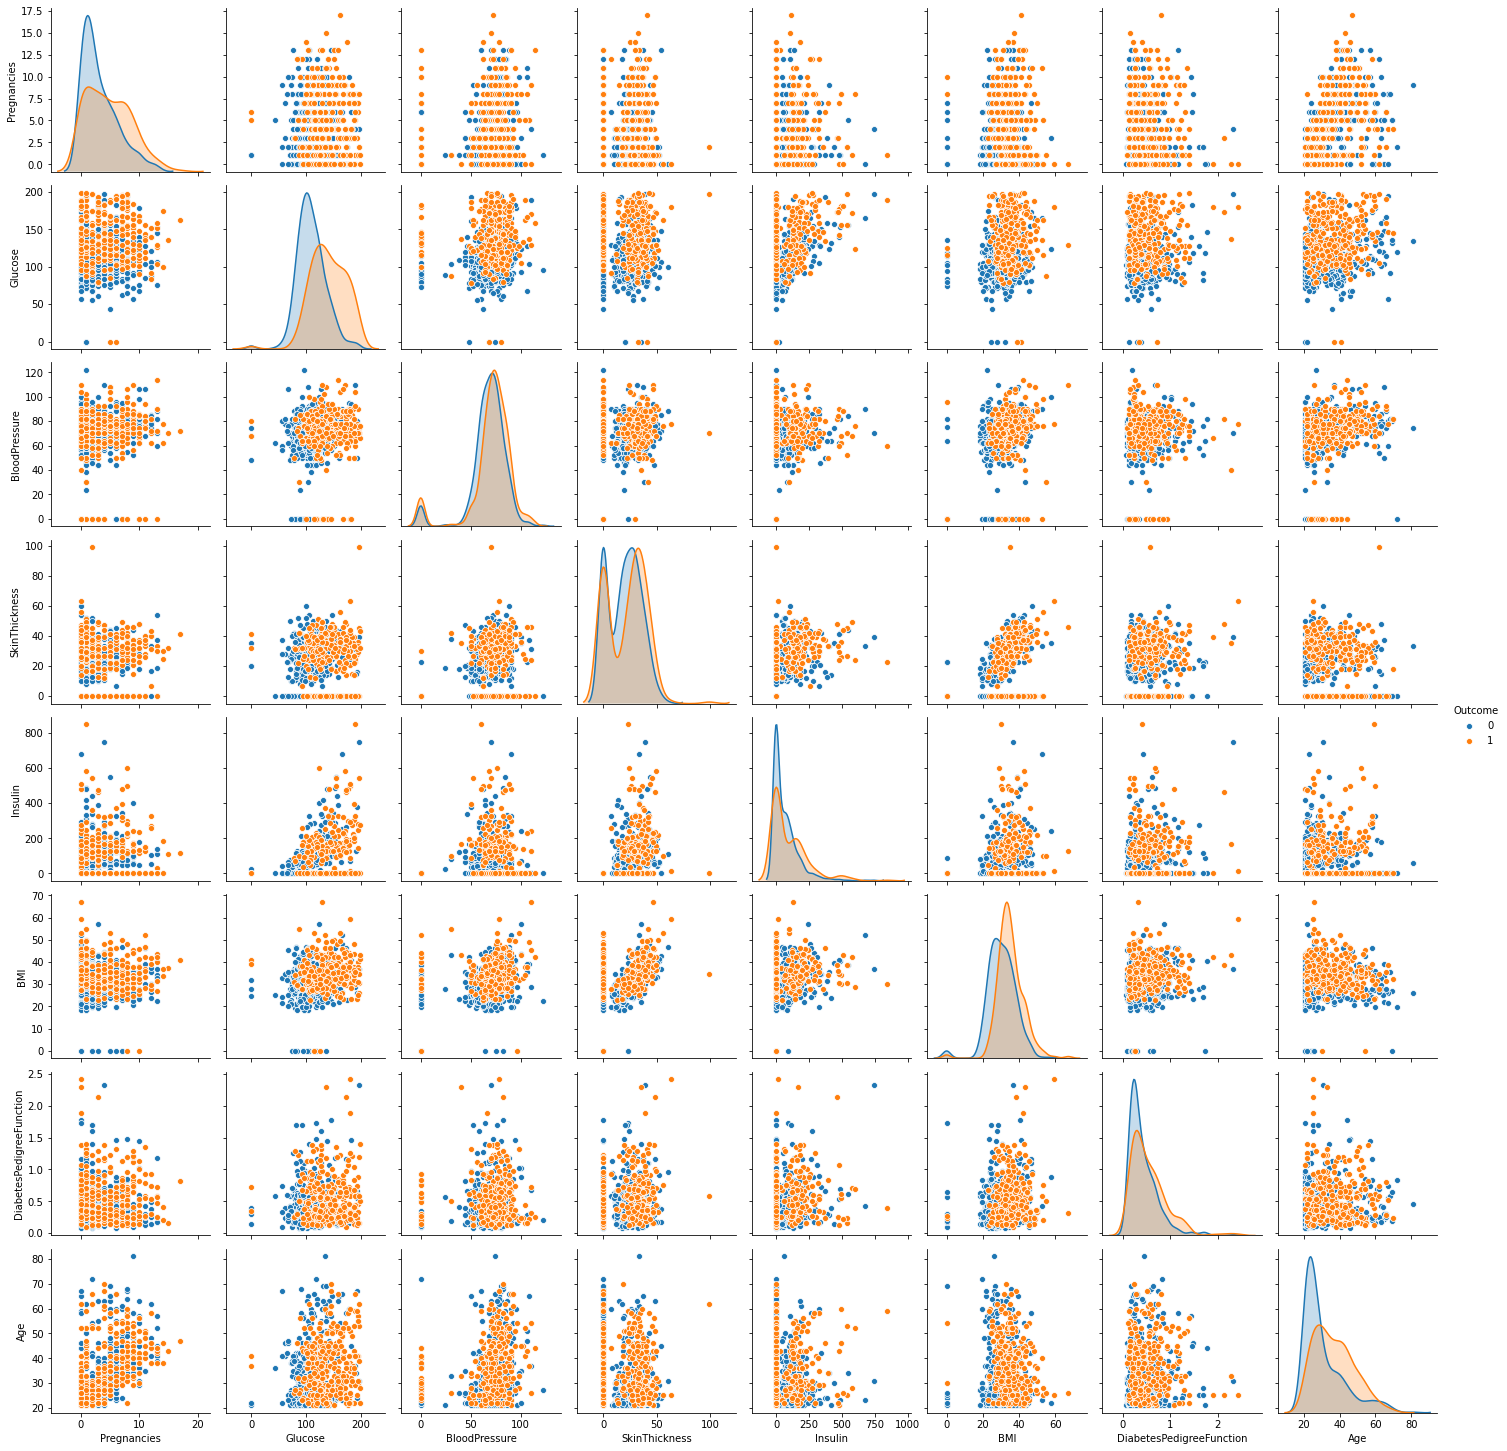

In [12]:
import seaborn as sns
sns.pairplot(df, hue = 'Outcome', diag_kind='kde')
plt.show()

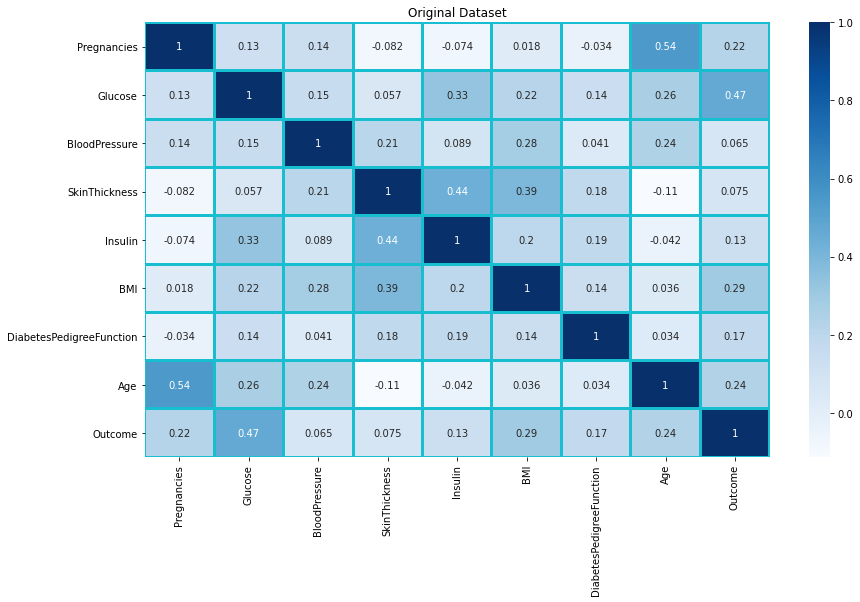

In [13]:
plt.figure(figsize = (14, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', linecolor = 'tab:cyan', linewidths = 2)
plt.title("Original Dataset")
plt.show()

In [0]:
data = df.copy(deep = True)
data.loc[:, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = \
                        data.loc[:, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [15]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

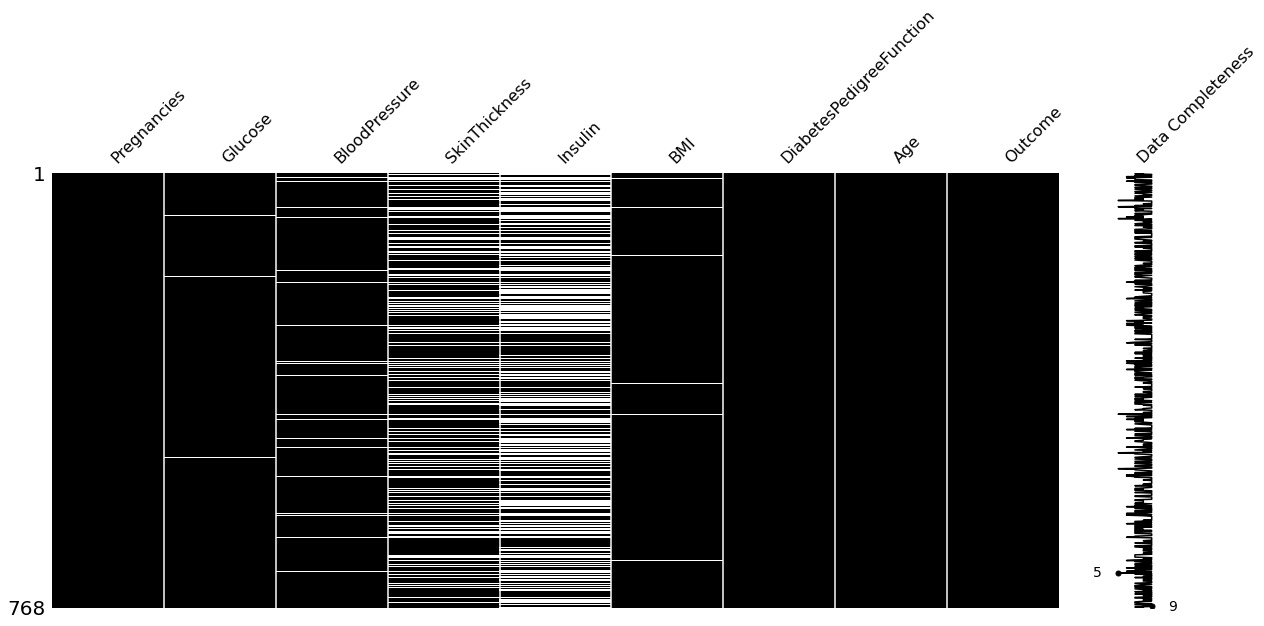

In [16]:
msno.matrix(data, figsize = (20, 8), labels = True, color = (0.0, 0.0, 0.0)) 
plt.show()

We have _ ways to deal with the missing data:  
1. Using Unchanged Data  
2. Dropping rows with missing data  
3. Dropping columns with missing data
4. Imputing missing values with mean
5. Imputing missing values with median
6. imputing missing values with hybrid mean and median for respective columns


In [0]:
#data.to_csv('./data/diabetes-UNCHANGED.csv')

In [19]:
data_dropped_rows = data.dropna()
#data_dropped_rows.to_csv('./data/diabates-DROP-ROWS.csv')
data_dropped_rows.shape

(392, 9)

In [20]:
nan_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_dropped_columns = data.drop(nan_columns, axis=1)
#data_dropped_columns.to_csv('./data/diabetes-DROP-COLUMNS.csv')
data_dropped_columns.shape

(768, 4)

In [0]:
imputer_mean = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
imputer_median = SimpleImputer(missing_values = np.NaN, strategy = 'median')

In [22]:
data_mean = data.copy(deep=True)

glucose_fit = imputer_mean.fit(data[['Glucose']])
data_mean[['Glucose']] = glucose_fit.transform(data[['Glucose']])

bp_fit = imputer_mean.fit(data[['BloodPressure']])
data_mean[['BloodPressure']] = bp_fit.transform(data[['BloodPressure']])

bp_fit = imputer_mean.fit(data[['SkinThickness']])
data_mean[['SkinThickness']] = bp_fit.transform(data[['SkinThickness']])

bp_fit = imputer_mean.fit(data[['Insulin']])
data_mean[['Insulin']] = bp_fit.transform(data[['Insulin']])

bp_fit = imputer_mean.fit(data[['BMI']])
data_mean[['BMI']] = bp_fit.transform(data[['BMI']])

#data_mean.to_csv('./data/diabetes-MEAN.csv')
print(data_mean.shape)
print(data_mean.isnull().sum())

(768, 9)
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [23]:
data_median = data.copy(deep=True)

glucose_fit = imputer_median.fit(data[['Glucose']])
data_median[['Glucose']] = glucose_fit.transform(data[['Glucose']])

bp_fit = imputer_median.fit(data[['BloodPressure']])
data_median[['BloodPressure']] = bp_fit.transform(data[['BloodPressure']])

bp_fit = imputer_median.fit(data[['SkinThickness']])
data_median[['SkinThickness']] = bp_fit.transform(data[['SkinThickness']])

bp_fit = imputer_median.fit(data[['Insulin']])
data_median[['Insulin']] = bp_fit.transform(data[['Insulin']])

bp_fit = imputer_median.fit(data[['BMI']])
data_median[['BMI']] = bp_fit.transform(data[['BMI']])

#data_median.to_csv('./data/diabetes-MEDIAN.csv')
print(data_median.shape)
print(data_median.isnull().sum())

(768, 9)
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [24]:
data_hybrid = data.copy(deep=True)

glucose_fit = imputer_mean.fit(data[['Glucose']])
data_hybrid[['Glucose']] = glucose_fit.transform(data[['Glucose']])

bp_fit = imputer_median.fit(data[['BloodPressure']])
data_hybrid[['BloodPressure']] = bp_fit.transform(data[['BloodPressure']])

bp_fit = imputer_median.fit(data[['SkinThickness']])
data_hybrid[['SkinThickness']] = bp_fit.transform(data[['SkinThickness']])

bp_fit = imputer_median.fit(data[['Insulin']])
data_hybrid[['Insulin']] = bp_fit.transform(data[['Insulin']])

bp_fit = imputer_median.fit(data[['BMI']])
data_hybrid[['BMI']] = bp_fit.transform(data[['BMI']])

#data_hybrid.to_csv('./data/diabetes-HYBRID.csv')
print(data_hybrid.shape)
print(data_hybrid.isnull().sum())

(768, 9)
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Intuition tells us that the hybrid dataset will yeild the best results

Now we start EDA on the hybrid dataset

In [25]:
dataset = data_hybrid.copy(deep=True)
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [27]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


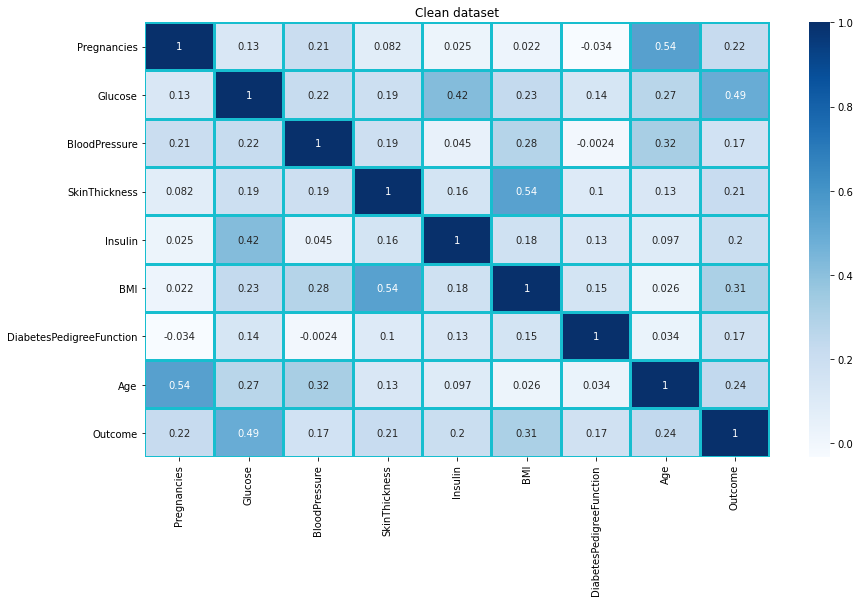

In [28]:
plt.figure(figsize = (14, 8))
sns.heatmap(dataset.corr(), annot = True, cmap = 'Blues', linecolor = 'tab:cyan', linewidths = 2)
plt.title("Clean dataset")
plt.show()

## Observations:

1. Correlations values have changed from the original dataset
2. Glucose has highest correlation with Outcome (0.49)
3. Pregnancies, BMI, Age also have high correlation.
4. SkinThickness and Insulin have considerable correlation.
5. BloodPressure and DiabetsPedigreeFunction have low correlation. These features will need to be analysed.

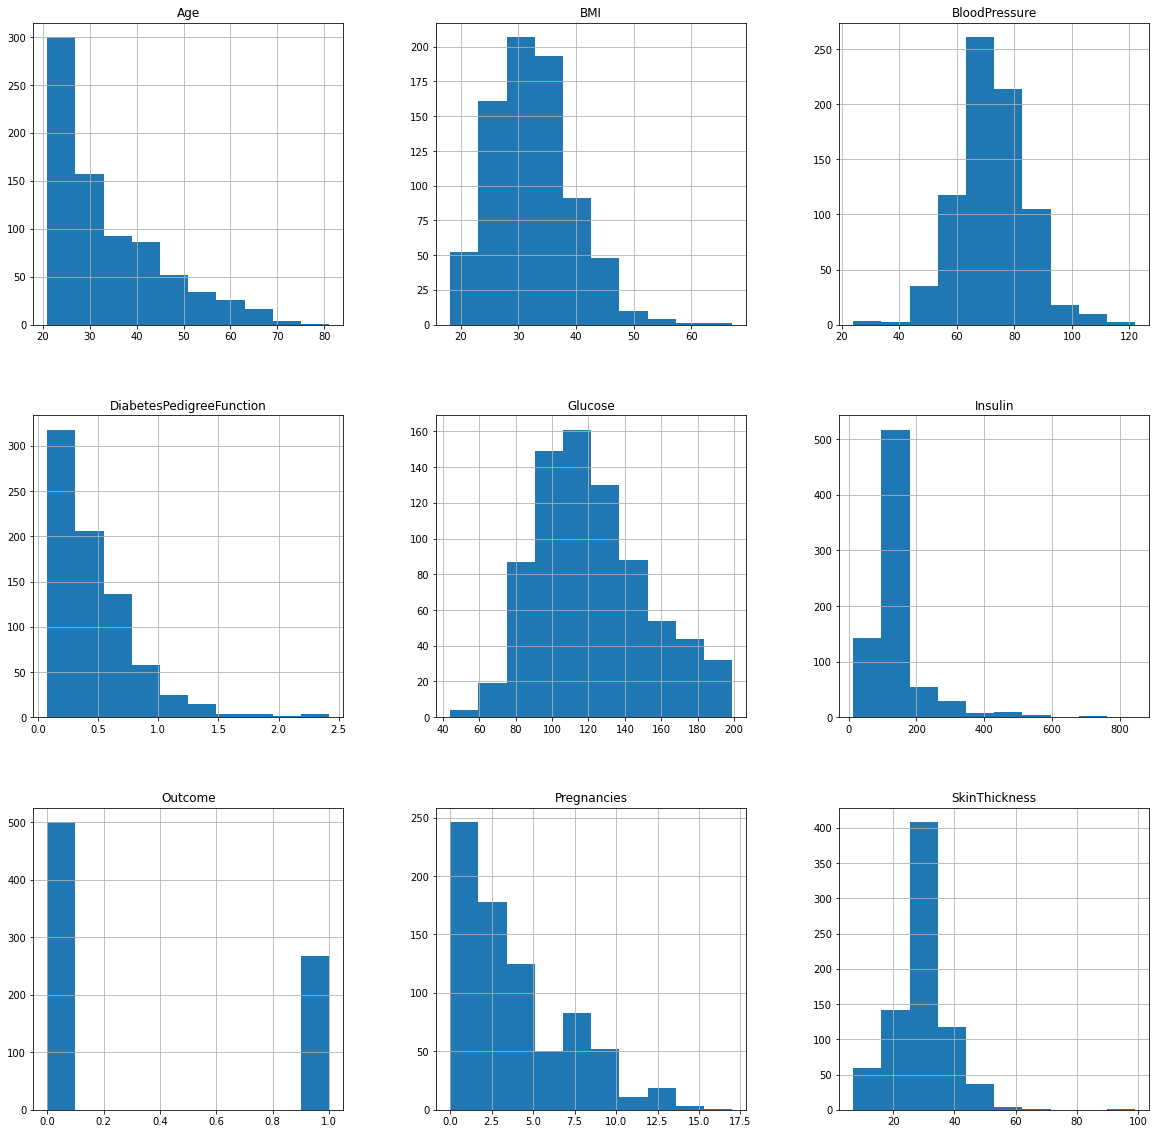

In [29]:
plot = dataset.hist(figsize=(20,20))

0    500
1    268
Name: Outcome, dtype: int64


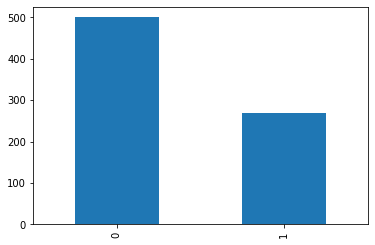

In [30]:
counts = dataset.Outcome.value_counts()
print(counts)
plot = counts.plot(kind="bar")

Unbalanced Data.
Number of non-diabetic patients is almost double of diabetic patients.

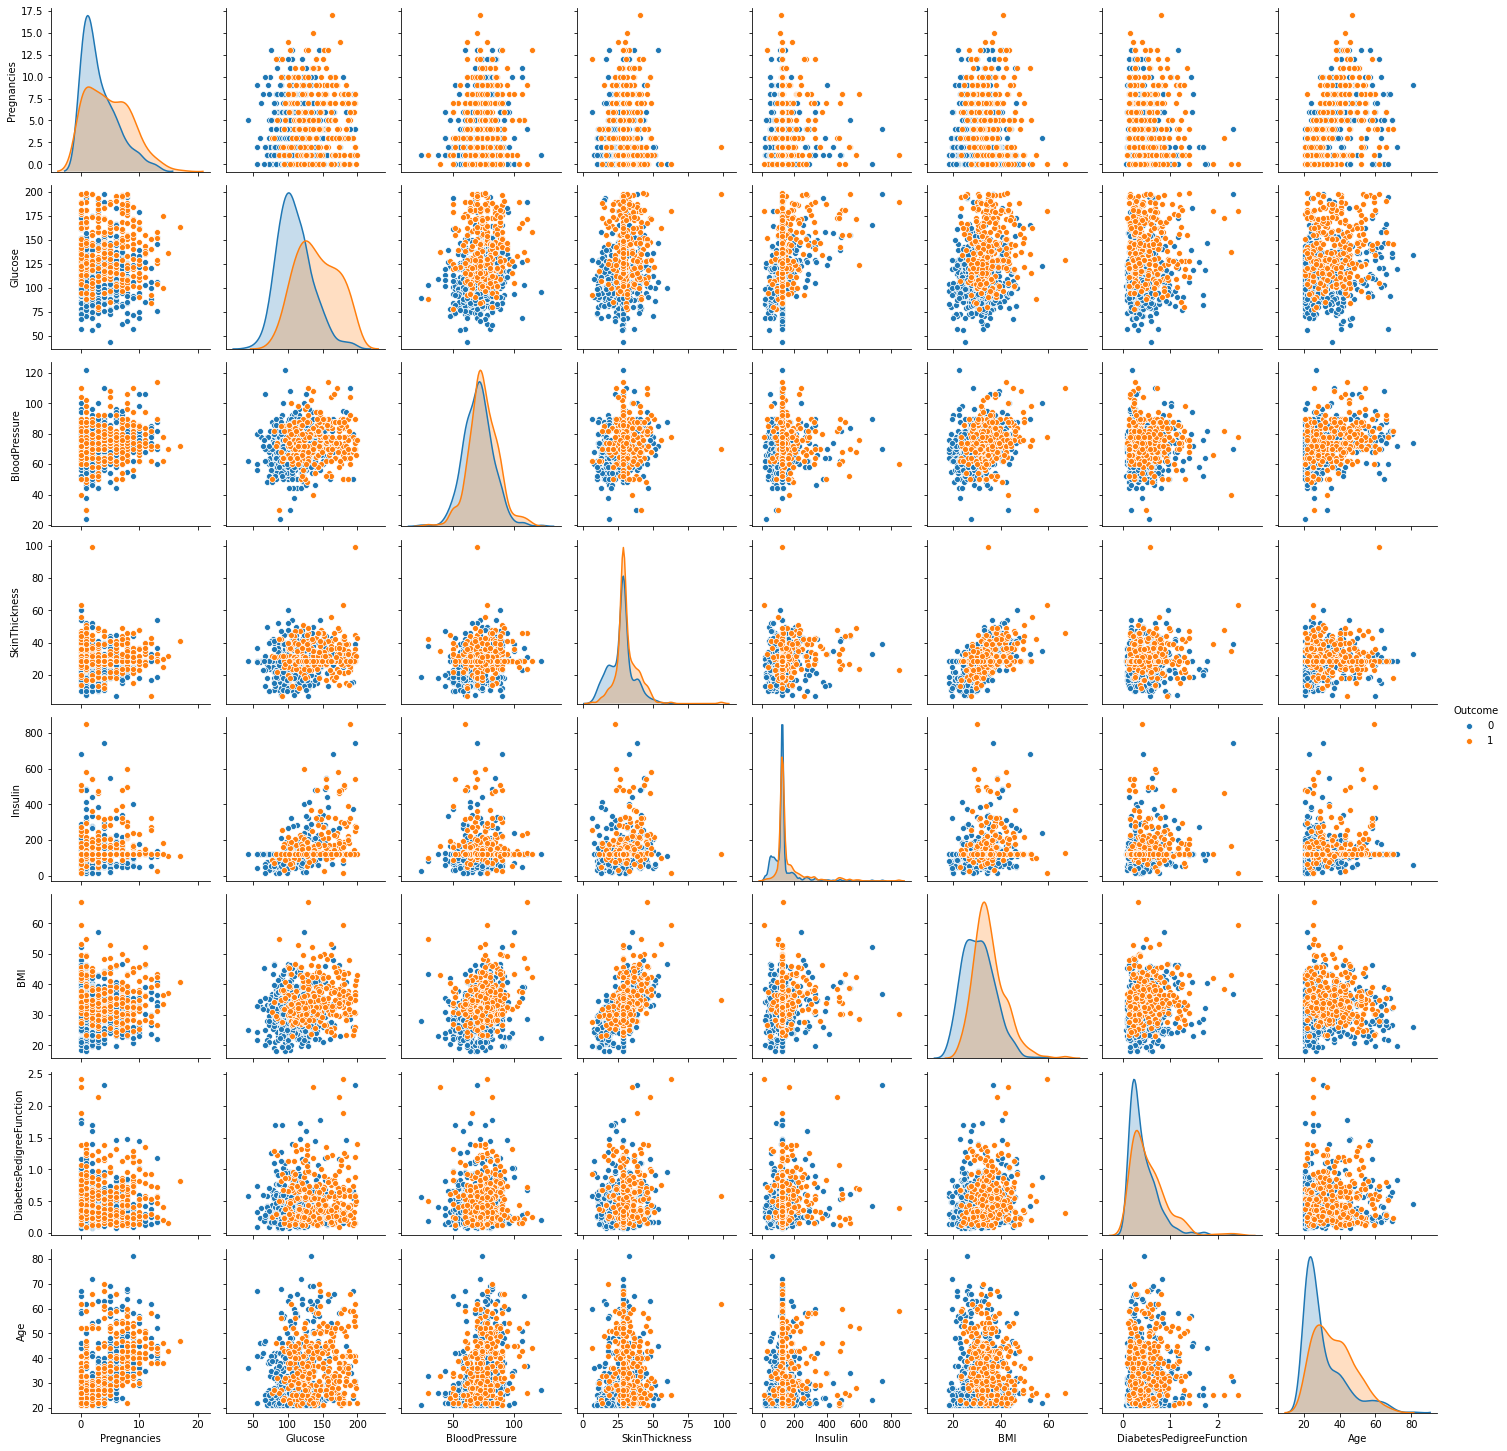

In [31]:
import seaborn as sns
sns.pairplot(dataset, hue = 'Outcome', diag_kind='kde')
plt.show()